In [5]:
import base64
from base64 import b64encode

import glob
import io

import numpy as np
import matplotlib.pyplot as plt
import matplotlib

import gymnasium as gym
import random
import sys

from IPython.display import HTML
from IPython import display
from IPython.display import clear_output

from gymnasium.wrappers.record_video import RecordVideo
from minigrid.wrappers import *
from gymnasium import spaces
from minigrid.core.constants import OBJECT_TO_IDX, COLOR_TO_IDX


plt.rcParams['figure.figsize'] = (12.0, 10.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%matplotlib inline
%reload_ext autoreload

In [6]:
env = gym.make('MiniGrid-Empty-5x5-v0', render_mode="rgb_array")

In [7]:
env.reset()
action = env.action_space.sample()
obs, reward, terminated, truncated, info  = env.step(action)

print("Action:", action)
print("Observation:", obs)
print("Reward:", reward)
print("Terminated:", terminated)
print("Truncated:", truncated)
print("Info:", info)

Action: 1
Observation: {'image': array([[[2, 5, 0],
        [2, 5, 0],
        [2, 5, 0],
        [2, 5, 0],
        [2, 5, 0],
        [2, 5, 0],
        [2, 5, 0]],

       [[2, 5, 0],
        [2, 5, 0],
        [2, 5, 0],
        [2, 5, 0],
        [8, 1, 0],
        [1, 0, 0],
        [1, 0, 0]],

       [[2, 5, 0],
        [2, 5, 0],
        [2, 5, 0],
        [2, 5, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0]],

       [[2, 5, 0],
        [2, 5, 0],
        [2, 5, 0],
        [2, 5, 0],
        [1, 0, 0],
        [1, 0, 0],
        [1, 0, 0]],

       [[2, 5, 0],
        [2, 5, 0],
        [2, 5, 0],
        [2, 5, 0],
        [2, 5, 0],
        [2, 5, 0],
        [2, 5, 0]],

       [[2, 5, 0],
        [2, 5, 0],
        [2, 5, 0],
        [2, 5, 0],
        [2, 5, 0],
        [2, 5, 0],
        [2, 5, 0]],

       [[2, 5, 0],
        [2, 5, 0],
        [2, 5, 0],
        [2, 5, 0],
        [2, 5, 0],
        [2, 5, 0],
        [2, 5, 0]]], dtype=uint8), 'directi

In [22]:
print (env.action_space)
print (env.observation_space)
print (env.observation_space['mission'].sample())


Discrete(7)
Dict('direction': Discrete(4), 'image': Box(0, 255, (7, 7, 3), uint8), 'mission': MissionSpace(<function EmptyEnv._gen_mission at 0x79586d90bb00>, None))
get to the green goal square


/home/ankdesh/explore/.venv/lib/python3.12/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.actions to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.actions` for environment variables or `env.get_wrapper_attr('actions')` that will search the reminding wrappers.
  logger.warn(


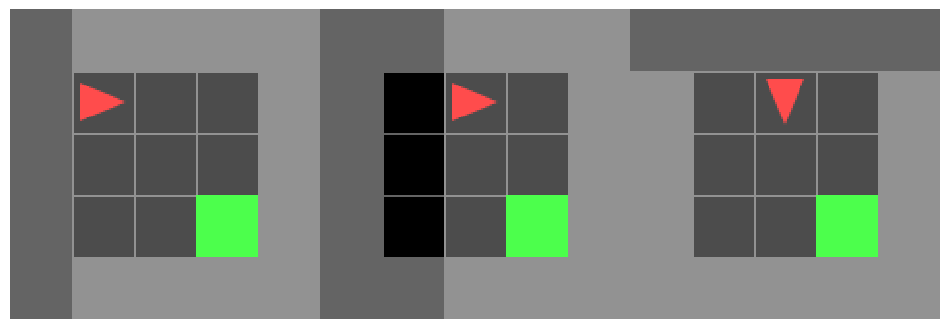

In [24]:
env.reset()

before_img = env.render()
plt.imshow(before_img);

action = env.actions.forward
obs, reward, terminated, truncated, info  = env.step(action)

after_img = env.render()

action = env.actions.right
obs, reward, terminated, truncated, info  = env.step(action)

final_img = env.render()

plt.imshow(np.concatenate([before_img, after_img, final_img], 1));
plt.axis('off')
plt.show()

In [25]:
class FlatObsWrapper(gym.core.ObservationWrapper):
    def __init__(self, env, max_env_steps=50):
        super().__init__(env)        
        self.observation_space = spaces.Box(
            low=0,
            high=255,
            shape=((self.env.width-2) * (self.env.height-2) * 3,),  # number of cells
            dtype='uint8'
        )
        self.unwrapped.max_steps = max_env_steps

    def observation(self, obs):
        env = self.unwrapped
        full_grid = env.grid.encode()
        full_grid[env.agent_pos[0]][env.agent_pos[1]] = np.array([
            OBJECT_TO_IDX['agent'],
            COLOR_TO_IDX['red'],
            env.agent_dir
        ])
        full_grid = full_grid[1:-1, 1:-1]
        
        flattened_grid = full_grid.ravel()
        return flattened_grid
    
    def render(self, *args, **kwargs):
        return self.unwrapped.render(*args, **kwargs)

Observation: [10  0  1  1  0  0  1  0  0  1  0  0  1  0  0  1  0  0  1  0  0  1  0  0
  1  0  0  1  0  0  1  0  0  1  0  0  1  0  0  1  0  0  1  0  0  1  0  0
  1  0  0  1  0  0  1  0  0  1  0  0  1  0  0  1  0  0  1  0  0  1  0  0
  1  0  0  1  0  0  1  0  0  1  0  0  1  0  0  1  0  0  1  0  0  1  0  0
  1  0  0  1  0  0  1  0  0  8  1  0] , Observation Shape:  (108,)
Reward: 0
terminated: False
truncated: False
info {}
Image shape: (256, 256, 3)


/home/ankdesh/explore/.venv/lib/python3.12/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.width to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.width` for environment variables or `env.get_wrapper_attr('width')` that will search the reminding wrappers.
  logger.warn(
/home/ankdesh/explore/.venv/lib/python3.12/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.height to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.height` for environment variables or `env.get_wrapper_attr('height')` that will search the reminding wrappers.
  logger.warn(


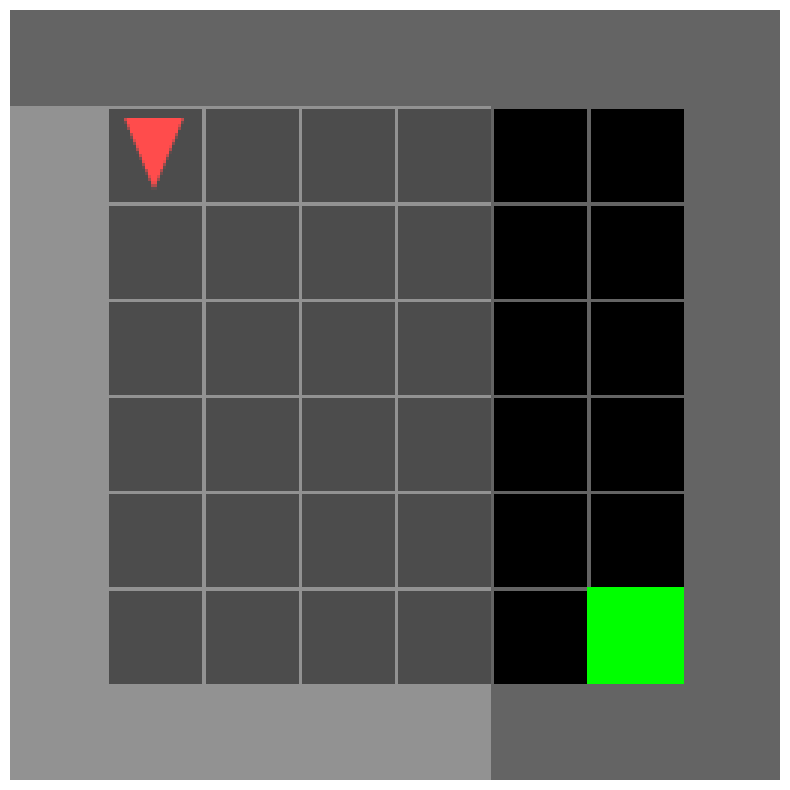

In [26]:
# Make use of the Flat Observable in your MiniGrid Environment
env = FlatObsWrapper(gym.make('MiniGrid-Empty-8x8-v0', render_mode="rgb_array"), max_env_steps = 200)

# Reset the environment
env.reset()

# Select the action right
action = env.actions.right

# Take a step in the environment and store it in appropriate variables
obs, reward, terminated, truncated, info  = env.step(action)


# Render the current state of the environment
img = env.render()
print('Observation:', obs, ', Observation Shape: ', obs.shape)
print('Reward:', reward)
print('terminated:', terminated)
print('truncated:', truncated)
print('info', info)
print('Image shape:', img.shape)
plt.imshow(img);
plt.axis('off')  # Hide axes for better visualization
plt.show()

In [42]:
# Random policy - nothing special
class RandPolicy:
    def __init__(self, action_space):
        self.action_space = action_space
        
    # def act(self, *unused_args):
    #     while True: # Keep sampling until a valid action is found
    #         action = self.action_space.sample()
    #         if action < 3 : 
    #             return action
            
    def act(self, *unused_args):
        action = self.action_space.sample() % 3 # Ensure the action is within the valid range. 
                                                # Favors 2 (forward action) a bit more 
        return action
        

In [44]:
# This function renders images of rollout of a given policy and environment
def log_policy_rollout(policy, env):
    # Create environment with flat observation
    obs, reward, terminated, truncated, info = [], -1, False, False, {}
    
    # Initialize environment
    observation = env.reset()
    episode_reward = 0
    episode_length = 0
    
    truncated = False
    while not truncated:
        # Take a step
        action = policy.act(observation)
        obs, reward, terminated, truncated, info = env.step(action)
        episode_reward += reward
        episode_length += 1
        
        print ('Action: ', action)
        print('Reward:', reward)
        print('Terminated:', terminated)
        print('Truncated:', truncated)
        print('Info', info)
        print('Step Nr.: ', episode_length)
        if episode_length > 30:
            truncated = True
        # Display what you see
        plt.imshow(env.render());
        plt.axis('off')
        plt.show()
        plt.pause(1)  # Pause for 1 second
        clear_output(wait=True) 
        
    print('Total reward:', episode_reward)
    print('Total length:', episode_length)

    env.close()
    return obs, reward, terminated, truncated, info
    
# Test that the logging function is working
test_env_name = 'MiniGrid-Empty-8x8-v0'
env = FlatObsWrapper(gym.make('MiniGrid-Empty-8x8-v0', render_mode="rgb_array"), max_env_steps = 200)
rand_policy = RandPolicy(env.action_space)

obs, reward, terminated, truncated, info = log_policy_rollout(rand_policy, env)
# print('Reward:', reward)
# print('Terminated:', terminated)
# print('Truncated:', truncated)
# print('Info', info)

# plt.imshow(env.render());
# plt.axis('off')
# plt.show()

Total reward: 0
Total length: 11
